Here we are given the following information: 
Standard model:
$$y_t = \mu + \sigma \epsilon_t$$
where $\epsilon_t$ is iid $\mathcal{N}(0,1)$. An extension with autocorrelation:
$$x_t = \rho x_{t-1} +\mu_t + \sigma_x \epsilon_t$$
In the second model, we have:
$$E[x_t] = \frac{\mu_x}{1-\rho}$$ and $$Var[x_t] = \frac{\sigma_x^2}{1-\rho^2}$$
We are also given, $\mu = 1%$, $\sigma = 5%$ and $\rho = 0.9$

Using this information we can solve for $\mu_x$ and $\sigma_x$, given that $E[x_t] =E[y_t]$ and $Var[x_t]=Var[y_t]$. Here we have:
$$E[y_t] = E[\mu + \sigma \epsilon_t] = \mu$$
so, 
$$\mu = E[x_t] \Rightarrow \mu = \frac{\mu_x}{1-\rho} \Rightarrow 0.01 = \frac{\mu_x}{1-0.9} \Rightarrow \mu_x = 0.001$$

Similarly,
$$Var[y_t] = Var[\mu + \sigma \epsilon_t] = \sigma^2$$
so, 
$$\sigma^2 = Var[x_t]  \Rightarrow \sigma^2 = \frac{\sigma_x^2}{1-\rho^2} \Rightarrow 0.05^2 = \frac{\sigma_x^2}{1-0.9^2} \Rightarrow \sigma_x = 0.0218$$

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Question I

## Part 1

In [90]:
N = 1000 #samples
T = 100 #observations
mu = 0.01
sigma = 0.05
rho = 0.9
mu_x = mu * (1 - rho)
sigma_x = np.sqrt(sigma ** 2 * (1 - rho **2))

E_xt = mu
Var_xt = sigma ** 2
Std_xt = np.sqrt(Var_xt)

np.random.seed(42)

### Unconditional distribution method

In [91]:
def compute_xt(N = N, T = T, E_xt  = E_xt, Std_xt = Std_xt):
    sampleEx = list()
    sampleStdx = list()

    for _ in range(N):
        epsilon_t = np.random.normal(0, 1, T)
        xt = np.zeros(T)
        x0 = np.random.normal(E_xt, Std_xt, 1)
        xt[0] = x0

        for ii in range(1, T):
            xt[ii] = rho * xt[ii - 1] + mu_x + sigma_x * epsilon_t[ii]

        sampleEx.append(np.mean(xt))
        sampleStdx.append(np.std(xt, ddof = 1))

    return sampleEx, sampleStdx

def compute_yt(N = N, T = T):
    sampleEy = list()
    sampleStdy = list()

    for _ in range(N):
        epsilon_t = np.random.normal(0, 1, T)

        yt = mu + sigma * epsilon_t

        sampleEy.append(np.mean(yt))
        sampleStdy.append(np.std(yt, ddof = 1))

    return sampleEy, sampleStdy



In [92]:
sample = np.linspace(1, N, N)
sampleEx, sampleStdx = compute_xt()
sampleEy, sampleStdy = compute_yt()
df = pd.DataFrame({'Sample #': sample,
                    'Sample mean (xt)': sampleEx,
                    'Sample STD (xt)': sampleStdx,
                    'Sample mean (yt)': sampleEy,
                    'Sample STD (yt)': sampleStdy})
df

C:\Users\hgavr\AppData\Local\Temp\ipykernel_17864\2609601656.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xt[0] = x0


,Sample #,Sample mean (xt),Sample STD (xt),Sample mean (yt),Sample STD (yt)
0,1.0,-0.018877,0.040111,0.018574,0.044567
1,2.0,0.024862,0.033610,0.012702,0.053398
2,3.0,0.020097,0.046820,0.006914,0.054333
3,4.0,0.029510,0.040048,0.013594,0.050737
4,5.0,0.003680,0.050517,0.006043,0.043568
...,...,...,...,...,...
995,996.0,0.001627,0.039372,0.003925,0.045773
996,997.0,0.037629,0.043786,0.010103,0.049992
997,998.0,-0.004589,0.034973,-0.004751,0.049853
998,999.0,0.015941,0.050124,0.014142,0.041898


### Burn-in method

In [93]:
def computeBurnIn_xt(N = N, T = T, E_xt = E_xt):
    burnSampleEx = list()
    burnSampleStdx = list()

    for n in range(N):
        
        X_0 = E_xt
        N_0 = 500
        for _ in range(N_0):
            epsilon_t = np.random.normal(0, 1, 1)
            X_0 = rho * X_0 + mu_x + sigma_x * epsilon_t

        epsilon_t = np.random.normal(0, 1, T)
        xt = np.zeros(T) 

        xt[0] = X_0
        for ii in range(1, T):
            xt[ii] = rho * xt[ii - 1] + mu_x + sigma_x * epsilon_t[ii]

        burnSampleEx.append(np.mean(xt))
        burnSampleStdx.append(np.std(xt, ddof = 1))

    return burnSampleEx, burnSampleStdx

In [94]:
burnSampleEx, burnSampleStdx = computeBurnIn_xt()
df_compare = pd.DataFrame({'Sample #': sample,
                    'Sample mean (uncond distrib)': sampleEx,
                    'Sample STD (uncond distrib)': sampleStdx,
                    'Sample mean (burn-in)': burnSampleEx,
                    'Sample STD (burn-in)': burnSampleStdx
                    })
df_compare

C:\Users\hgavr\AppData\Local\Temp\ipykernel_17864\1418912634.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xt[0] = X_0


,Sample #,Sample mean (uncond distrib),Sample STD (uncond distrib),Sample mean (burn-in),Sample STD (burn-in)
0,1.0,-0.018877,0.040111,-0.024055,0.065428
1,2.0,0.024862,0.033610,-0.027323,0.044691
2,3.0,0.020097,0.046820,-0.002803,0.065088
3,4.0,0.029510,0.040048,0.009692,0.052729
4,5.0,0.003680,0.050517,-0.025927,0.055095
...,...,...,...,...,...
995,996.0,0.001627,0.039372,0.002989,0.043607
996,997.0,0.037629,0.043786,0.010615,0.038752
997,998.0,-0.004589,0.034973,0.015307,0.043210
998,999.0,0.015941,0.050124,0.039505,0.038044


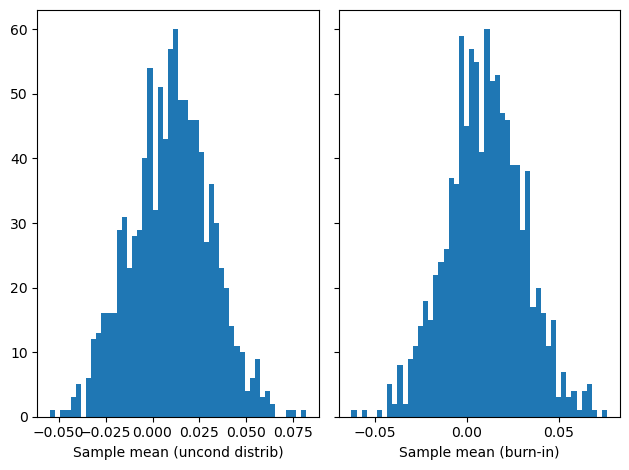

In [95]:
mean_ud = df_compare['Sample mean (uncond distrib)']
mean_bi = df_compare['Sample mean (burn-in)']

n_bins = 50
fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)

axs[0].hist(mean_ud, bins = n_bins)
axs[0].set_xlabel('Sample mean (uncond distrib)')
axs[1].hist(mean_bi, bins = n_bins)
axs[1].set_xlabel('Sample mean (burn-in)')
plt.show()

## Part 2

In [96]:
df

,Sample #,Sample mean (xt),Sample STD (xt),Sample mean (yt),Sample STD (yt)
0,1.0,-0.018877,0.040111,0.018574,0.044567
1,2.0,0.024862,0.033610,0.012702,0.053398
2,3.0,0.020097,0.046820,0.006914,0.054333
3,4.0,0.029510,0.040048,0.013594,0.050737
4,5.0,0.003680,0.050517,0.006043,0.043568
...,...,...,...,...,...
995,996.0,0.001627,0.039372,0.003925,0.045773
996,997.0,0.037629,0.043786,0.010103,0.049992
997,998.0,-0.004589,0.034973,-0.004751,0.049853
998,999.0,0.015941,0.050124,0.014142,0.041898


In [97]:
mean_x = df['Sample mean (xt)']
mean_y = df['Sample mean (yt)']
std_x = df['Sample STD (xt)']
std_y = df['Sample STD (yt)']

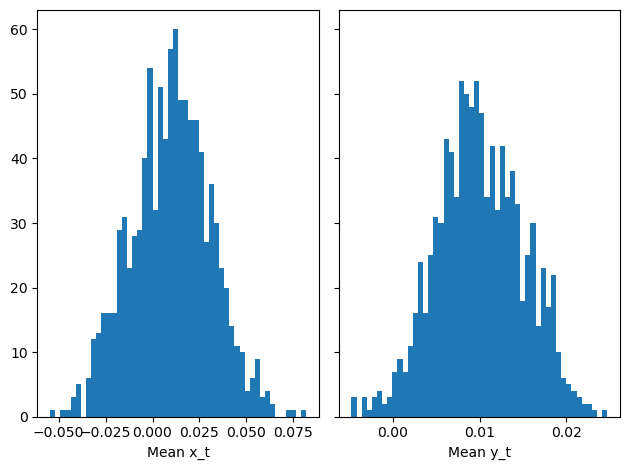

In [98]:
n_bins = 50
fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)

axs[0].hist(mean_x, bins = n_bins)
axs[0].set_xlabel('Mean x_t')
axs[1].hist(mean_y, bins = n_bins)
axs[1].set_xlabel('Mean y_t')
plt.show()

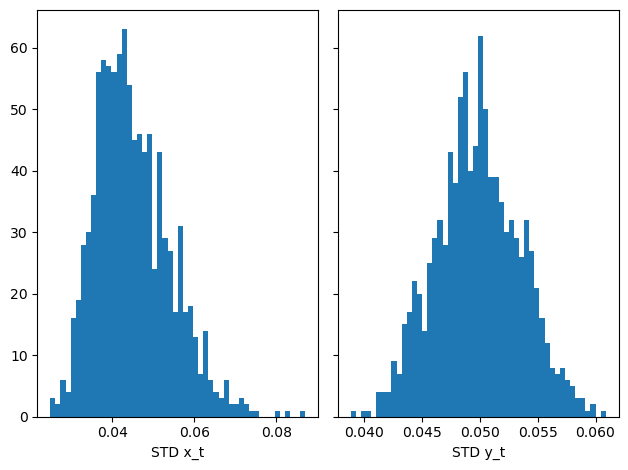

In [99]:
n_bins = 50
fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)

axs[0].hist(std_x, bins = n_bins)
axs[0].set_xlabel('STD x_t')
axs[1].hist(std_y, bins = n_bins)
axs[1].set_xlabel('STD y_t')
plt.show()

In [103]:
df_stds = pd.DataFrame({'xt': [np.std(mean_x), np.std(std_x)],
                        'yt': [np.std(mean_y), np.std(std_y)]}, 
                        index = ['Standard Deviation of Sample Mean', 'Standard Deviation of Sample STD'])
df_stds

,xt,yt
Standard Deviation of Sample Mean,0.021182,0.004974
Standard Deviation of Sample STD,0.009120,0.003645


### TO DO
Do
the two models have similar sampling uncertainty?


### Part 3

In [105]:
kurtosis_mean_x = kurtosis(mean_x)
kurtosis_std_x = kurtosis(std_x)
kurtosis_mean_y = kurtosis(mean_y)
kurtosis_std_y = kurtosis(std_y)

skewness_mean_x = skew(mean_x)
skewness_std_x = skew(std_x)
skewness_mean_y = skew(mean_y)
skewness_std_y = skew(std_y)

In [107]:
df_moments = pd.DataFrame({'xt': [kurtosis_mean_x, kurtosis_std_x, skewness_mean_x, skewness_std_x],
                        'yt': [kurtosis_mean_y, kurtosis_std_x, skewness_mean_y, skewness_std_y]}, 
                        index = ['Kurtosis of Sample Mean', 'Kurtosis of Sample STD','Skewness of Sample Mean', 'Skewness of Sample STD'])
df_moments

,xt,yt
Kurtosis of Sample Mean,-0.112970,-0.214075
Kurtosis of Sample STD,0.687122,0.687122
Skewness of Sample Mean,0.005922,0.002667
Skewness of Sample STD,0.721591,0.054778


### TO DO
Are these similar?

### TO DO
Discuss results